# K-Prototype Clustering

**About Blood Transfusion dataset**<br><br>
To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build a FRMTC model, we selected 748 donors at random from the donor database. These 748 donor data, each one included R (Recency - months since last donation), F (Frequency - total number of donation), M (Monetary - total blood donated in c.c.), T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

**Attribute Information:**

- R (Recency - months since last donation), 
- F (Frequency - total number of donation), 
- M (Monetary - total blood donated in c.c.), 
- T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). 

- Variable	Data Type	Measurement	Description	min	max	mean	std 
- Recency quantitative	Months	Input	0.03	74.4	9.74	8.07 
- Frequency quantitative	Times	Input	1	50	5.51	5.84 
- Monetary	quantitative	c.c. blood	Input	250	12500	1378.68	1459.83 
- Time quantitative	Months	Input	2.27	98.3	34.42	24.32 
- Whether he/she donated blood in March 2007	binary	1=yes 0=no	Output	0	1	1 (24%) 0 (76%) 

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
help(KPrototypes)

Help on class KPrototypes in module kmodes.kprototypes:

class KPrototypes(kmodes.kmodes.KModes)
 |  KPrototypes(n_clusters=8, max_iter=100, num_dissim=<function euclidean_dissim at 0x000001B722AC54E0>, cat_dissim=<function matching_dissim at 0x000001B722AC5300>, init='Cao', n_init=10, gamma=None, verbose=0, random_state=None, n_jobs=1)
 |  
 |  k-protoypes clustering algorithm for mixed numerical/categorical data.
 |  
 |  Parameters
 |  -----------
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  max_iter : int, default: 100
 |      Maximum number of iterations of the k-modes algorithm for a
 |      single run.
 |  
 |  num_dissim : func, default: euclidian_dissim
 |      Dissimilarity function used by the algorithm for numerical variables.
 |      Defaults to the Euclidian dissimilarity function.
 |  
 |  cat_dissim : func, default: matching_dissim
 |      Dissimilarity function used by

In [3]:
# Reading Dataset
blood = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data', sep=",",engine = 'python')

In [4]:
#Sanity Check
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
# standardizing data
scaler=StandardScaler()
columns_to_normalize = ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']
blood[columns_to_normalize]=scaler.fit_transform(blood[columns_to_normalize])

In [6]:
# converting dtype to str for last columns
blood['whether he/she donated blood in March 2007']=blood['whether he/she donated blood in March 2007'].astype('str')

In [7]:
# Converting the dataset into matrix
blood_matrix = blood.to_numpy()

In [8]:
# Martix for analysis
blood_matrix

array([[-0.9278987345988959, 7.62334626135984, 7.62334626135984,
        2.6156334449690104, '1'],
       [-1.1751180590797417, 1.2827382634817053, 1.2827382634817053,
        -0.257880899643511, '1'],
       [-1.0515083968393188, 1.7968416146610133, 1.7968416146610138,
        0.02947053481774113, '1'],
       ...,
       [1.6679041724499837, -0.4309395737826554, -0.4309395737826555,
        1.1378260677397136, '0'],
       [3.645658768296749, -0.7736751412355276, -0.7736751412355277,
        0.1936713545098852, '0'],
       [7.724777622230703, -0.7736751412355276, -0.7736751412355277,
        1.5483281169700738, '0']], dtype=object)

In [9]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(blood_matrix, categorical=[4])

In [10]:
kproto.cluster_centroids_

array([['1.1598625463039418', '-0.4965348976970803',
        '-0.4965348976970803', '-0.17872667675363693', '0'],
       ['-0.5261673323175213', '6.102457180787721', '6.10245718078772',
        '2.4463013496614883', '1'],
       ['-0.6466867530019336', '-0.5209076602390347',
        '-0.5209076602390347', '-0.9025401594556898', '0'],
       ['-0.2629100453307987', '1.6428275305524445',
        '1.6428275305524445', '1.4423250561561582', '0'],
       ['-0.2935246189499332', '0.236748111868459',
        '0.23674811186845895', '0.5681576579115443', '0']], dtype='<U32')

In [11]:
# Checking the cost of the clusters created.
kproto.cost_

909.3681461274575

In [12]:
# Adding the predicted clusters to the main dataset
blood['cluster_id'] = clusters

In [13]:
# Re-check
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007,cluster_id
0,-0.927899,7.623346,7.623346,2.615633,1,1
1,-1.175118,1.282738,1.282738,-0.257881,1,4
2,-1.051508,1.796842,1.796842,0.029471,1,3
3,-0.927899,2.482313,2.482313,0.439973,1,3
4,-1.051508,3.167784,3.167784,1.753579,0,3


In [14]:
# Checking the clusters created
blooddf = pd.DataFrame(blood['cluster_id'].value_counts())
blooddf

,count
cluster_id,
2,240
4,212
0,209
3,79
1,8


<Axes: xlabel='cluster_id', ylabel='count'>

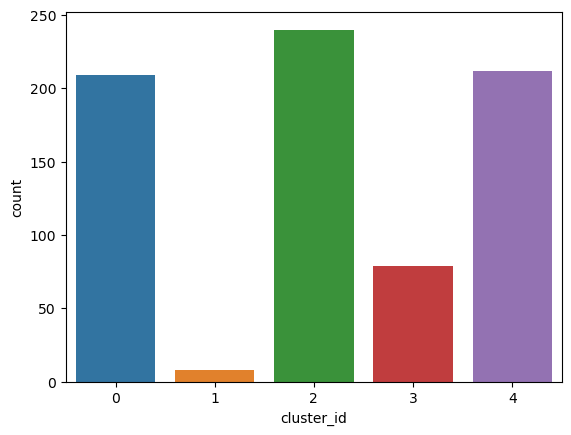

In [15]:
sns.barplot(x=blooddf.index, y=blooddf['count'])

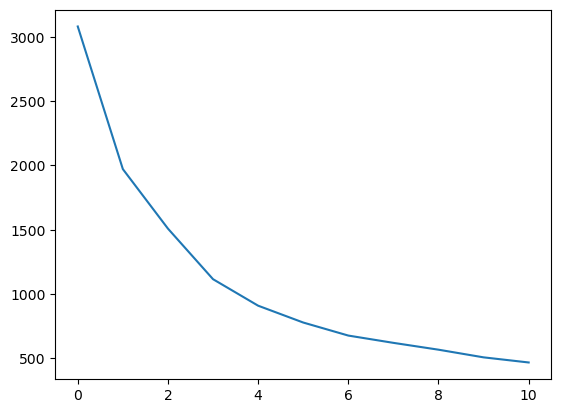

In [20]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,12)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(blood_matrix, categorical=[4])
    cost.append(kproto.cost_)
    
plt.plot(cost)